In [15]:
import os
import audio_fft
import stream_fft
import seaborn
import matplotlib.pyplot as plt
import sounddevice as sd

seaborn.set_style("whitegrid")
%matplotlib inline
sd.default.samplerate = 44100
sd.default.channels = 2

total time 6.0s


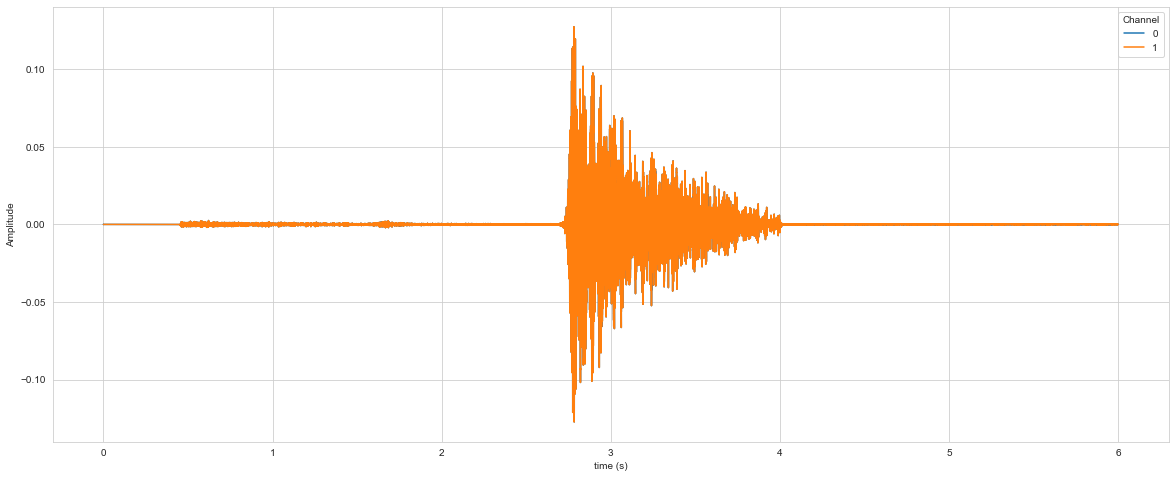

In [20]:
a_fft = audio_fft.AudioFFT()
a_fft.samplerate = sd.default.samplerate
a_fft.channels = sd.default.channels

a_fft.set_data(stream_fft.rec_reference_sound(duration=6))
fig, ax = plt.subplots(figsize=(20,8))
a_fft.signal_plot(a_fft.get_data(), ax)
plt.show()

total time 1.2290249433106577s


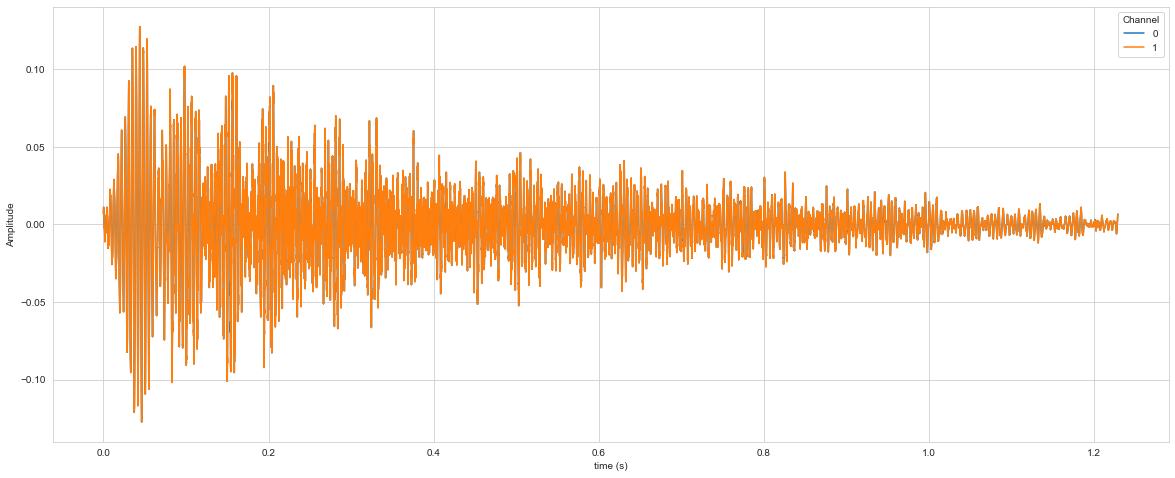

In [21]:
sliced_data = audio_fft.slice_time(a_fft.get_data(), a_fft.samplerate, 0, 10, 10)
trimmed_data = audio_fft.trim_data(sliced_data)
a_fft.set_data(trimmed_data)

fig, ax = plt.subplots(figsize=(20,8))
a_fft.signal_plot(a_fft.get_data(), ax)
plt.show()

In [22]:
sd.play(a_fft.get_data())
sd.wait()

[2, 2]
maximum_amp 382.1672689626506
maximum_amp 382.16907404932283
maximum_amp 382.1672689626506
maximum_amp 382.16907404932283


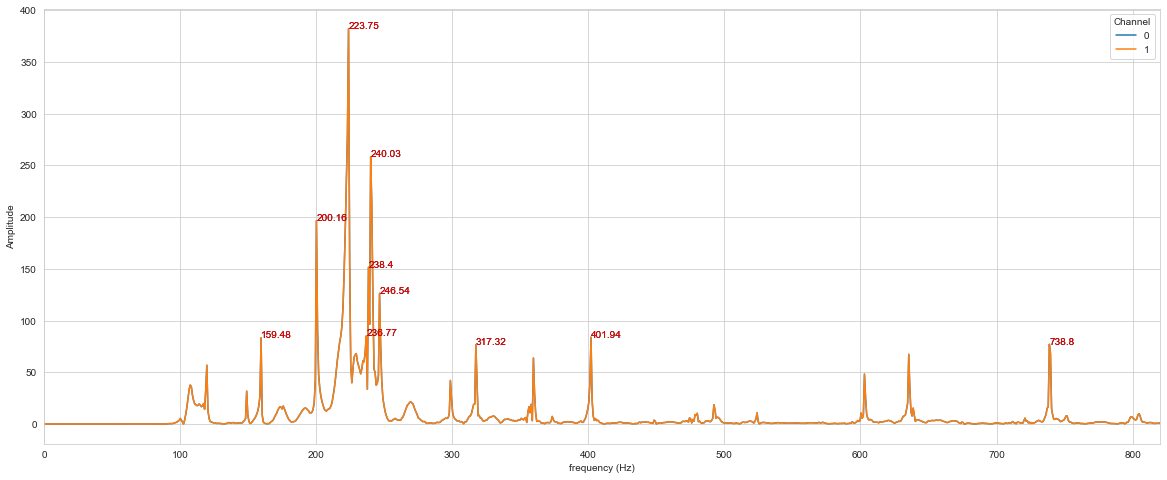

In [23]:
a_fft.channels = sd.default.channels[0] # Channels is a input output pair
print(sd.default.channels)
a_fft.set_fdata()
a_fft.set_frequencies()
a_fft.find_dominant_frequencies()
fig, ax = plt.subplots(figsize=(20,8))
a_fft.frequency_plot(a_fft.get_fdata(), ax, pad = 100)
plt.show()

In [24]:
stream_fft.save_reference_sound('.\\chords\\e-chord.wav', a_fft.get_data())